In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)


import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns

from src.sampler_jax import hmc, hamiltonian_side_move
from src.visualize.corner import corner

# Test Function

In [3]:
dim = 3
initial = jnp.ones(dim)
cov = jnp.eye(dim)

def gaussian_log_prob(params):
    return -0.5 * jnp.sum(jnp.einsum('i,ij,j->', params, cov, params))

In [4]:
# Simulation Setup
n_samples = 10**5
burn_in = 10**4
total_samples = n_samples + burn_in

# HMC

100%|██████████| 109999/109999 [02:39<00:00, 688.60it/s]


[0.13241939]


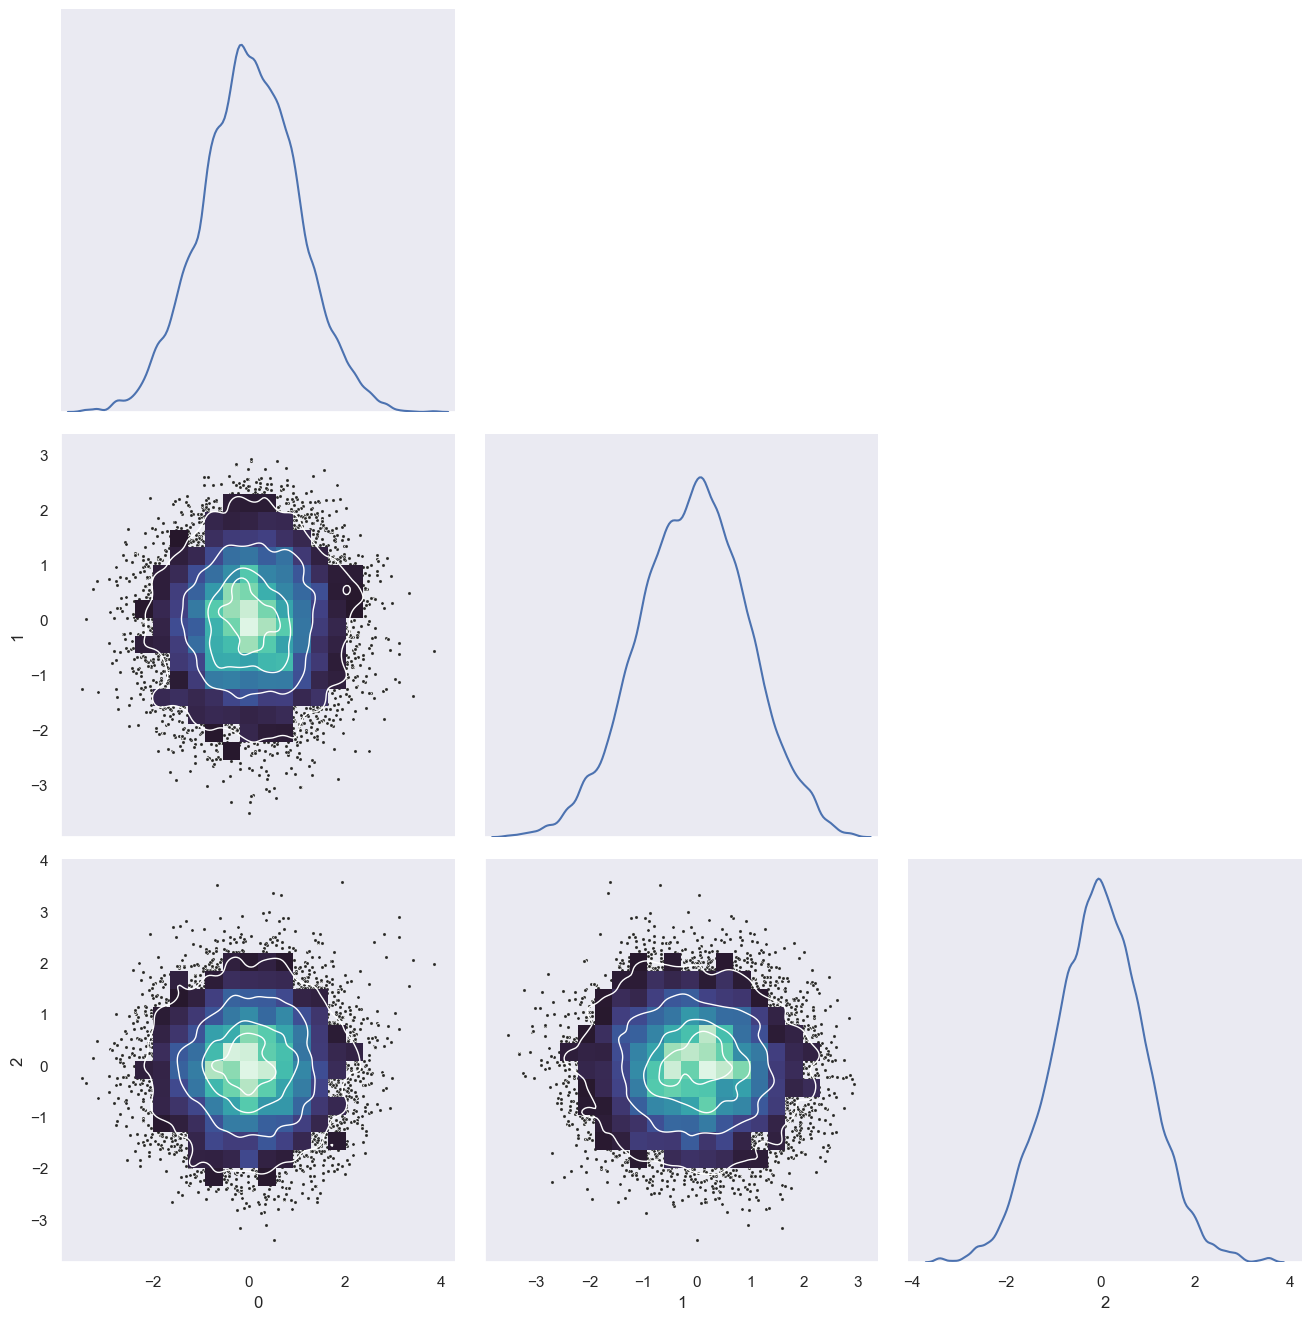

In [7]:


epsilon = 0.1
L = 10
n_chains = 1
n_thin = 1

# Burn-in
samples, acceptance_rates = hmc(gaussian_log_prob, 
                                initial,  
                                n_samples=total_samples,
                                epsilon=epsilon,
                                L=L,
                                n_chains=n_chains,
                                n_thin=n_thin,
                                key=jax.random.PRNGKey(0))

samples = samples.reshape(-1, len(initial))
post_burn_in_samples = samples[burn_in:, :]

print(acceptance_rates)
corner(post_burn_in_samples.reshape(-1, len(initial)))

# HMC Side Move

100%|██████████| 20000/20000 [03:36<00:00, 92.28it/s] 


[1.      0.99985 1.      1.      0.99995 1.      1.      1.      1.
 1.     ]


/Users/clarkmiyamoto/miniconda3/envs/thejoker/lib/python3.13/site-packages/numpy/_core/numeric.py:961: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/Users/clarkmiyamoto/miniconda3/envs/thejoker/lib/python3.13/site-packages/numpy/_core/numeric.py:961: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/Users/clarkmiyamoto/miniconda3/envs/thejoker/lib/python3.13/site-packages/numpy/_core/numeric.py:961: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
/Users/clarkmiyamoto/miniconda3/envs/thejoker/lib/python3.13/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)


ValueError: array must not contain infs or NaNs

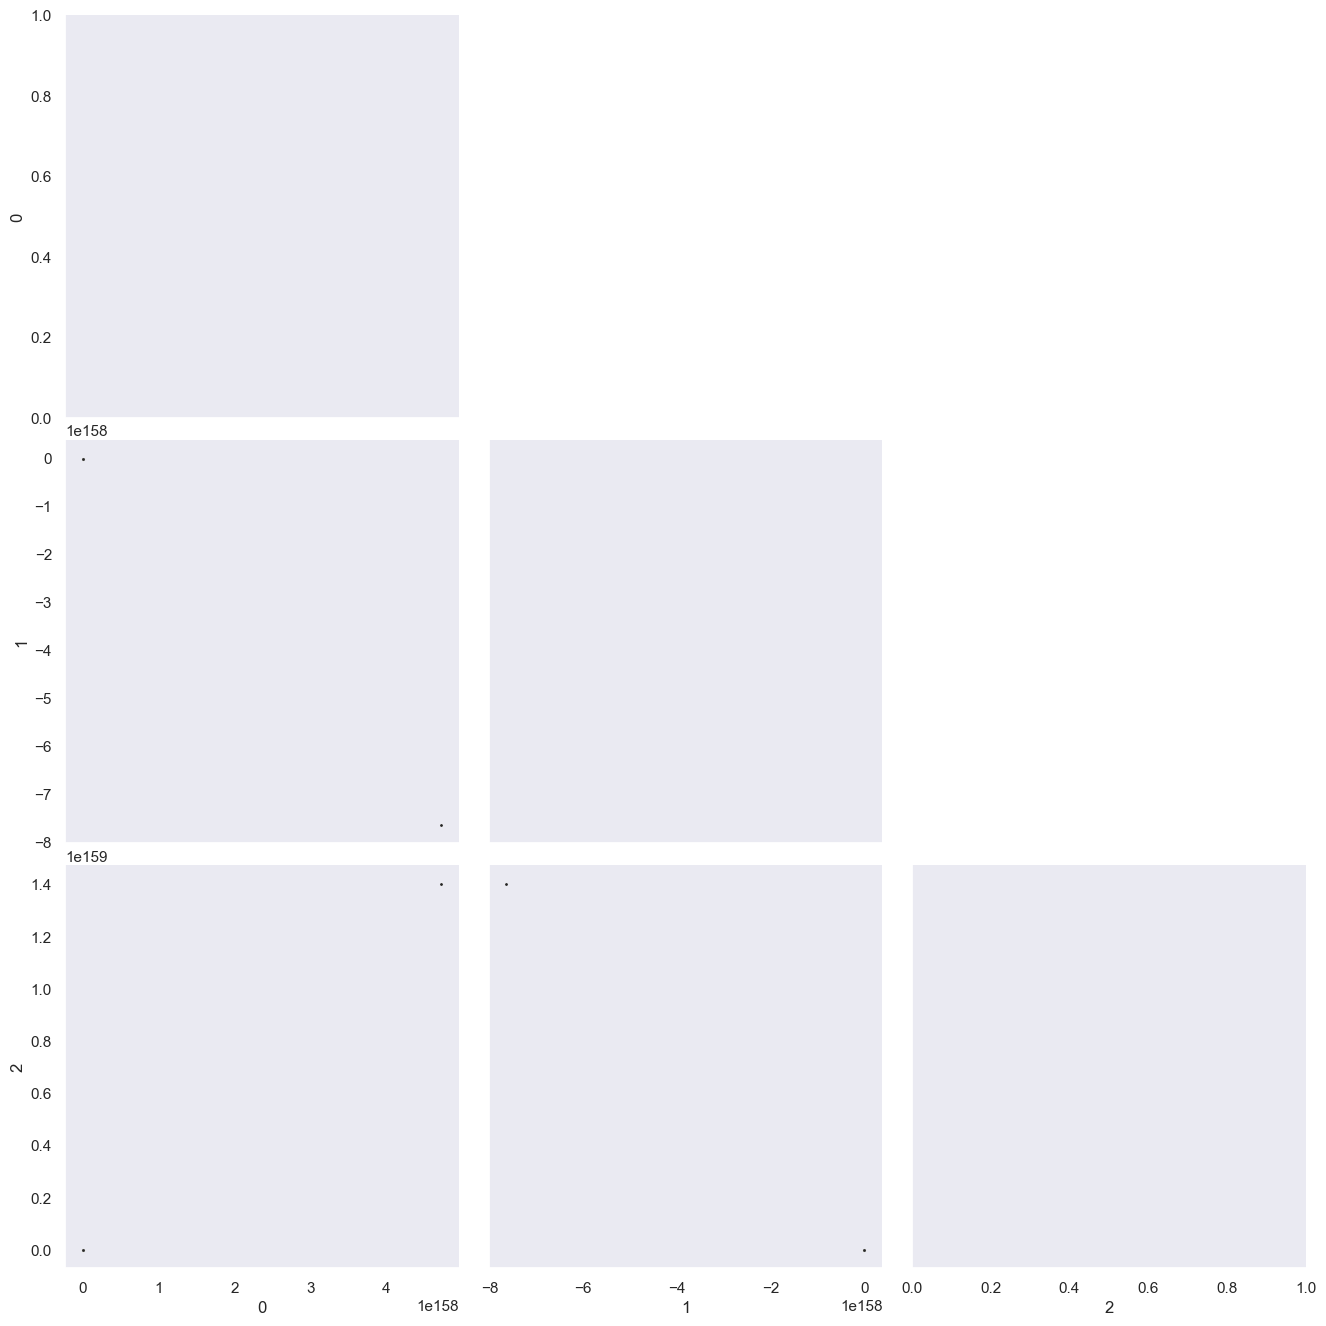

In [24]:
epsilon = 0.1
L = 10
n_chains = 5
n_thin = 1


samples, acceptance_rates = hamiltonian_side_move(gaussian_log_prob, 
                                                  initial=initial, 
                                                  n_samples=2 * 10**4, 
                                                  n_chains_per_group=n_chains, 
                                                  epsilon=epsilon, 
                                                  L=L,
                                                  beta=1.0,
                                                  key=jax.random.PRNGKey(0))
samples = samples.reshape(-1, len(initial))
post_burn_in_samples = samples[burn_in:, :]

print(acceptance_rates)
corner(post_burn_in_samples.reshape(-1, len(initial)))

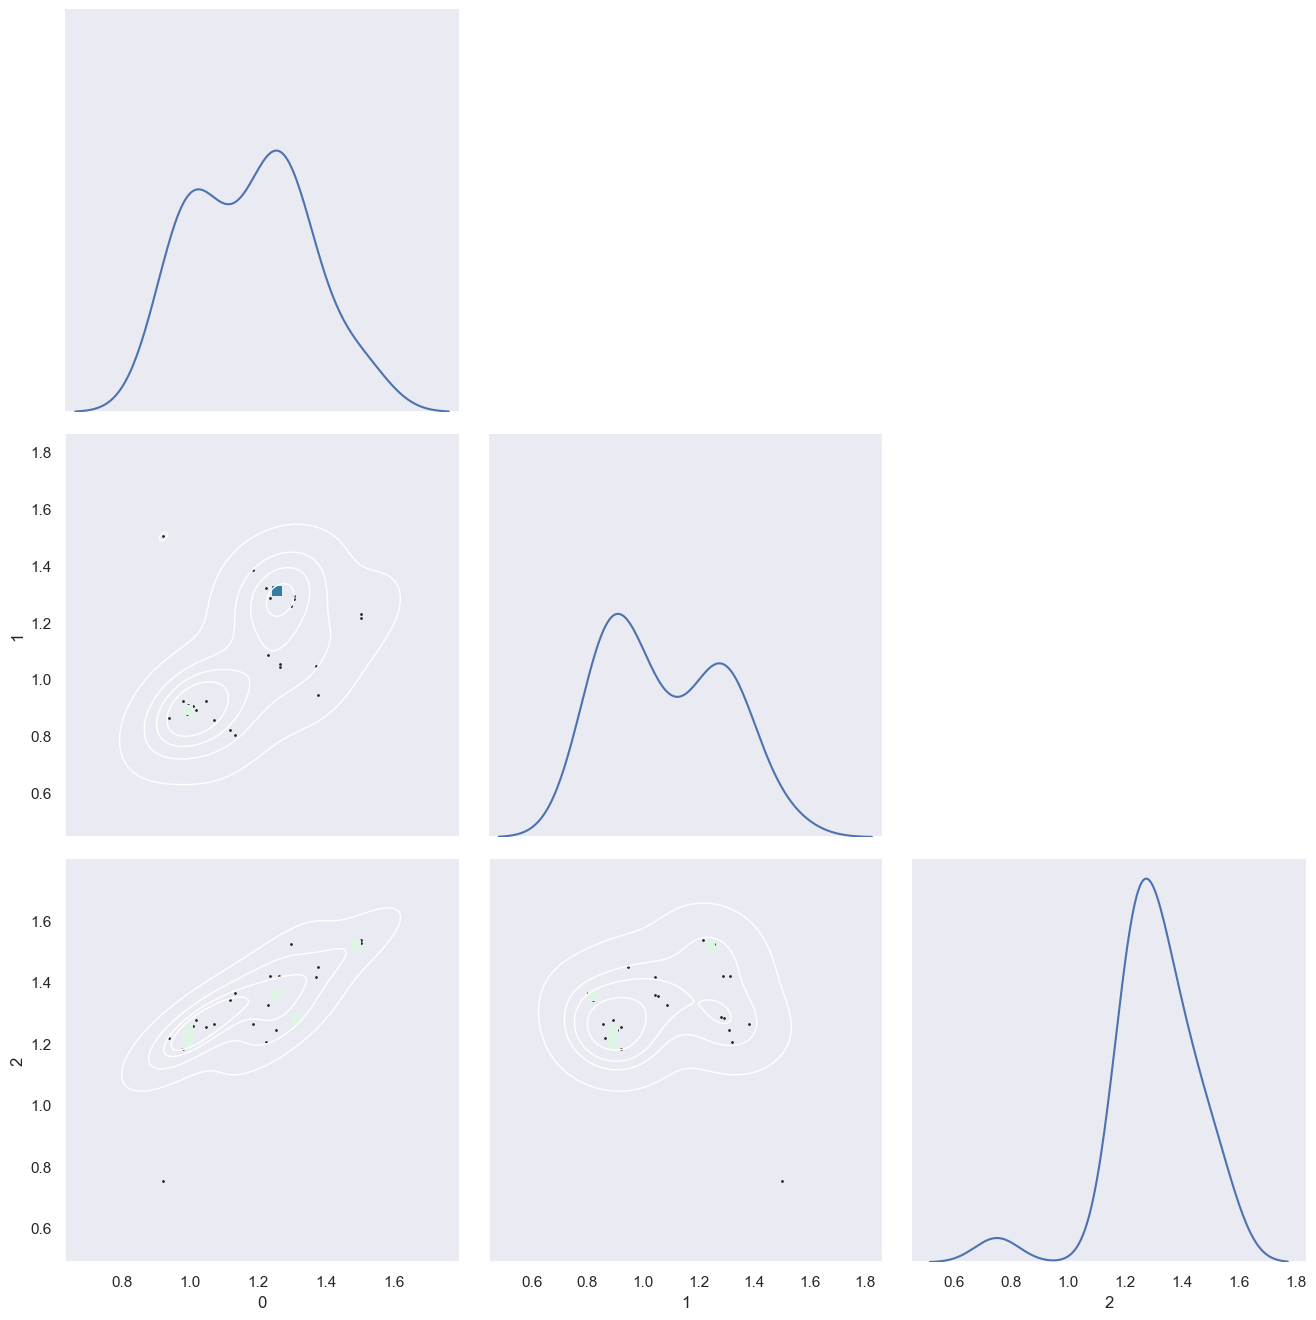

In [39]:
corner(samples[:27])

# HMC Walk Move